In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
raw_data = pd.read_csv('013 IndexE8.csv')
data = raw_data.copy()
data.date = pd.to_datetime(data.date, dayfirst = True)
data.set_index('date', inplace = True)
data = data.asfreq('b')
data = data.fillna(method = 'ffill')
data['market_value'] = data.nikkei

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
model_sarimax_1_0_1 = SARIMAX(data.market_value, exog = data.ftse, order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax_1_0_1 = model_sarimax_1_0_1.fit()
print(results_sarimax_1_0_1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -41956.142
Date:                           Sat, 03 Apr 2021   AIC                          83926.283
Time:                                   14:19:04   BIC                          83973.496
Sample:                               01-07-1994   HQIC                         83942.642
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse           1.0073      0.032     31.568      0.000       0.945       1.070
ar.L1          0.9998      0.000   2909.209

In [6]:
model_sarimax_2 = SARIMAX(data.market_value, exog = data[['ftse','dax','nikkei']], order = (1,1,1), seasonal_order = (2,0,1,5))
results_sarimax_2 = model_sarimax_2.fit()
print(results_sarimax_2.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 5)   Log Likelihood               66477.258
Date:                           Sat, 03 Apr 2021   AIC                        -132936.515
Time:                                   10:01:32   BIC                        -132875.815
Sample:                               01-07-1994   HQIC                       -132915.483
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse       -1.249e-15   1.73e-22  -7.23e+06      0.000   -1.25e-15   -1.25e-15
dax            1.0000   1.66e-21   6.04e+20

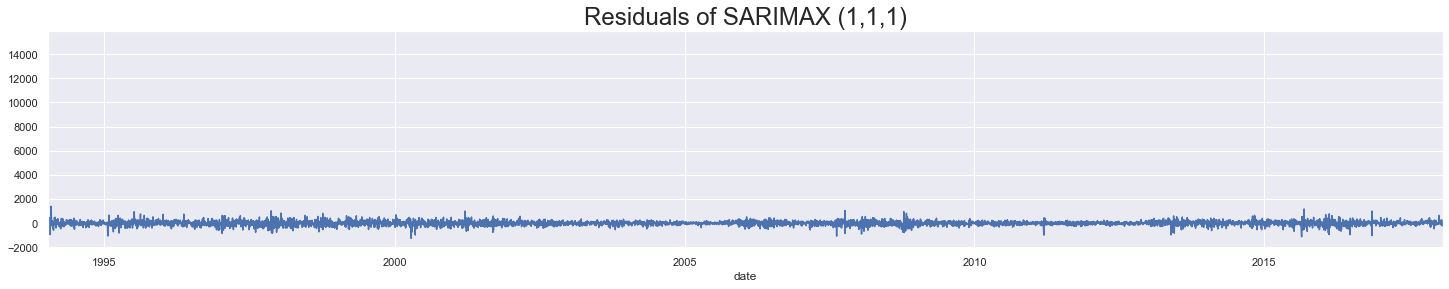

In [6]:
data['res_sarimax_2'] = results_sarimax_2.resid
data['res_sarimax_2'].plot(figsize = (25,4))
plt.title('Residuals of SARIMAX (1,1,1)', size = 24)
plt.show()

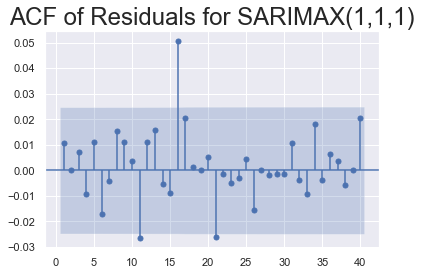

In [7]:
sgt.plot_acf(data['res_sarimax_2'], zero = False, lags = 40)
plt.title('ACF of Residuals for SARIMAX(1,1,1)', size = 24)
plt.show()

In [10]:
#ARCH Model
from arch import arch_model
model_arch_1 = arch_model(data.nikkei, mean = 'constant', vol = 'ARCH', p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     22,   Neg. LLF: 59207.15325529456
Iteration:     10,   Func. Count:     42,   Neg. LLF: 59099.40813928079
Iteration:     15,   Func. Count:     62,   Neg. LLF: 58999.332939015825
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58999.332432257805
            Iterations: 19
            Function evaluations: 92
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 nikkei   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -58999.3
Distribution:                  Normal   AIC:                           118005.
Method:            Maximum Likelihood   BIC:                           118025.
                                        No. Observations:                 6277
Date:                Sat, Apr 03 2021   Df Residuals:                     6276
Time:                        19:07:38   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.5989e+04     80.489    198.649      0.000 [1.583e+04,1.615e+04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.6350e+06  7.906e+04     20.679  5.347e-95 [1.480e+06,1.790e+06]
alpha[1]       0.8409  5.167e-03    162.746      0.000     [  0.831,  0.851]
============================================================================

Covariance estimator: robust
"""

In [11]:
model_garch_1 = arch_model(data.nikkei, mean = 'constant', vol = 'GARCH', p = 1, q = 1)
results_garch_1 = model_garch_1.fit(update_freq = 5)
results_garch_1.summary()

Iteration:      5,   Func. Count:     28,   Neg. LLF: 58809.896391086935
Iteration:     10,   Func. Count:     53,   Neg. LLF: 58444.57349793789
Iteration:     15,   Func. Count:     79,   Neg. LLF: 58438.27266636576
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58438.27266636576
            Iterations: 16
            Function evaluations: 83
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 nikkei   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -58438.3
Distribution:                  Normal   AIC:                           116885.
Method:            Maximum Likelihood   BIC:                           116912.
                                        No. Observations:                 6277
Date:                Sat, Apr 03 2021   Df Residuals:                     6276
Time:                        19:07:45   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.6243e+04     81.405    199.531      0.000 [1.608e+04,1.640e+04]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.2699e+05  1.881e+04     17.385  1.064e-67  [2.901e+05,3.639e+05]
alpha[1]       0.9316  3.792e-02     24.569 2.742e-133      [  0.857,  1.006]
beta[1]    3.2275e-15  4.126e-02  7.823e-14      1.000 [-8.086e-02,8.086e-02]
=============================================================================

Covariance estimator: robust
"""

In [12]:
data['returns'] = data.market_value.pct_change(1)*100

<AxesSubplot:xlabel='date'>

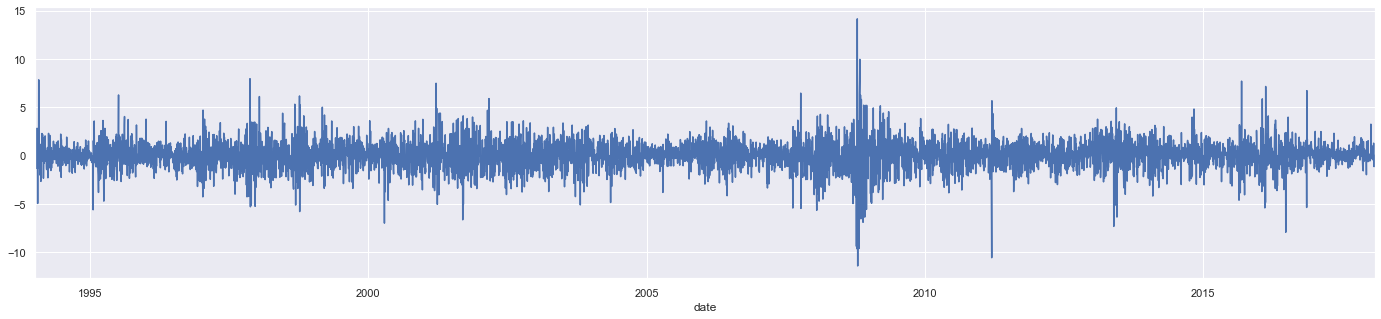

In [19]:
data['returns'].plot(figsize = (24,5))

<AxesSubplot:xlabel='date'>

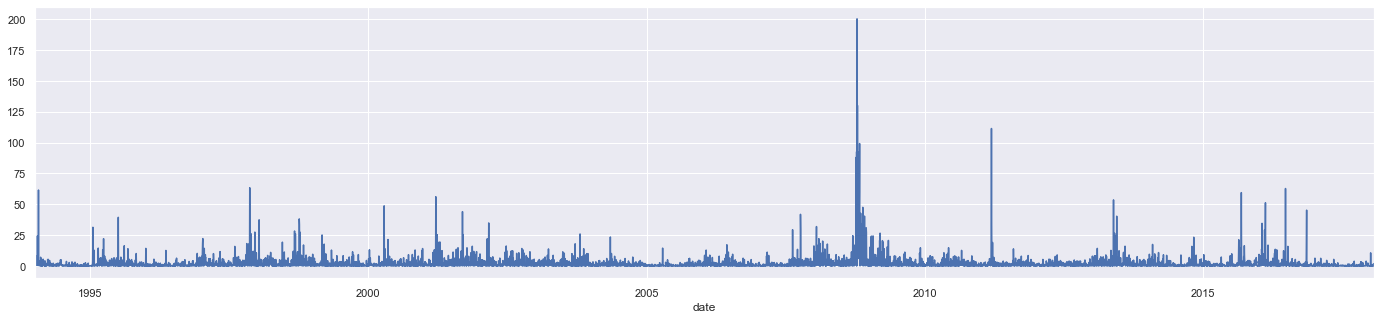

In [20]:
data['squared'] = data['returns'].mul(data['returns'])
data['squared'].plot(figsize = (24,5))

In [18]:
#ARCH Model
from arch import arch_model
model_arch_ret_1 = arch_model(data.returns, mean = 'AR', vol = 'ARCH', p = 2)
results_arch_ret_1 = model_arch_ret_1.fit(update_freq = 5)
results_arch_ret_1.summary()

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 11
            Gradient evaluations: 2


C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\arch\univariate\base.py:708: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                    nan
Distribution:                  Normal   AIC:                               nan
Method:            Maximum Likelihood   BIC:                               nan
                                        No. Observations:                 6277
Date:                Sat, Apr 03 2021   Df Residuals:                     6276
Time:                        19:11:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const             nan        nan        nan        nan [    nan,    nan]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega             nan        nan        nan        nan [    nan,    nan]
alpha[1]       0.0500        nan        nan        nan [    nan,    nan]
alpha[2]       0.0500        nan        nan        nan [    nan,    nan]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [21]:
#ARCH Model
from arch import arch_model
model_garch_ret_1 = arch_model(data.returns, mean = 'constant', vol = 'GARCH', p = 1, q = 1)
results_garch_ret_1 = model_garch_ret_1.fit(update_freq = 5)
results_garch_ret_1.summary()

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 11
            Gradient evaluations: 2


C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\arch\univariate\base.py:708: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                    nan
Distribution:                  Normal   AIC:                               nan
Method:            Maximum Likelihood   BIC:                               nan
                                        No. Observations:                 6277
Date:                Sat, Apr 03 2021   Df Residuals:                     6276
Time:                        19:16:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu                nan        nan        nan        nan [    nan,    nan]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega             nan        nan        nan        nan [    nan,    nan]
alpha[1]       0.0100        nan        nan        nan [    nan,    nan]
beta[1]        0.4900        nan        nan        nan [    nan,    nan]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""